In [ ]:
import matplotlib.pyplot as plt
import numpy as np



Jag börjar med att importera de biblioteken jag anser mig behöva. Numpy för array-manipulation och matplotlib för att plotta grafer

In [ ]:


def ClassifyPoints(points, line):
    """The function will classify the points an array, checking if the points are above/below a line specified as k*x+m. Class added in added third row"""
    pointsZeroColumn = np.zeros((points.shape[0], 1))               # Prepairing to store class result in points array
    points = np.column_stack((points, pointsZeroColumn)) 
    k = line[0]
    m = line[1]
    for point in points:
        point[2] = bool(point[1] > k*point[0] + m)
    return points


Funktionen tar emot hela testdata-arrayen, samt en rad ur nedstående class_line-array innehållandes k och m. Funktionen lägger till en ny kolumn där alla klassificeringar sparas.

In [ ]:

class_line =  np.array([[-1, 0],                                    # Array with k and m for y(x), f(x) g(x), h(x) 
                        [-0.489, 0],
                        [-2, 0.16],
                        [800, 120]])
unlabelled_data = np.genfromtxt("unlabelled_data.csv", delimiter=",")
labelled_data = np.empty([class_line.shape[0], unlabelled_data.shape[0], unlabelled_data.shape[1]+1])


I nästa del skapas arrayer för att underlätta loopar. Unlabelled_data från cvs-fil läses in. labelled_data är en 3D array. 

In [ ]:

for i in range(class_line.shape[0]):
    labelled_data[i,:,:] = ClassifyPoints(unlabelled_data, class_line[i])


För varje rad i class_line anropas ClassifyPoints och dess resultat sparas i labelled_data.

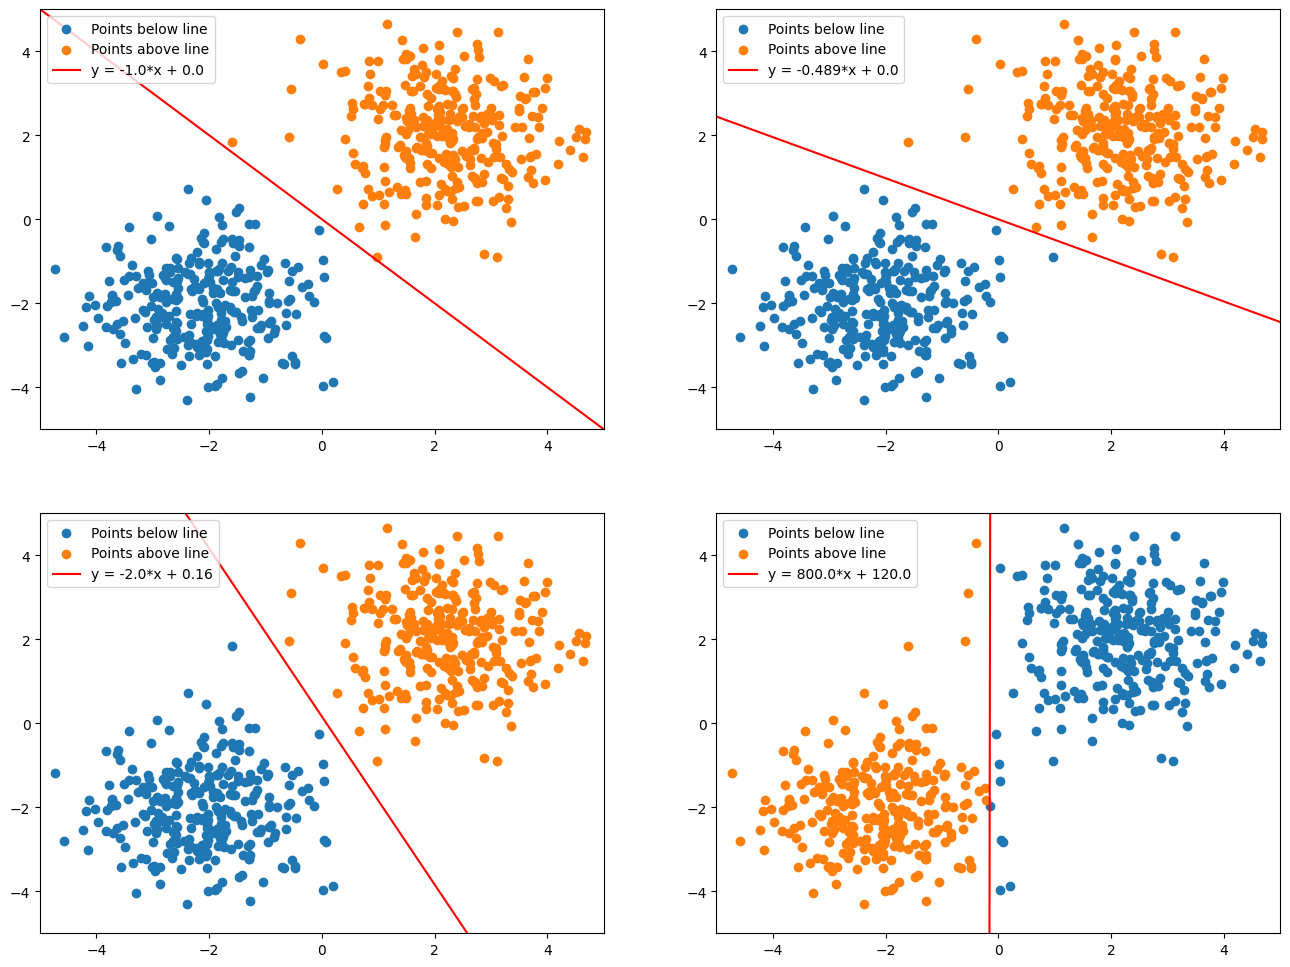

In [36]:

x = np.linspace(-5,5)                                       
plt.figure(figsize=(16,12), dpi=100)
for i in range(class_line.shape[0]):                                # Plotting subplots for y(x), f(x) g(x), h(x) 
    k = class_line[i, 0]
    m = class_line[i, 1]
    labelled_data_i = labelled_data[i,:,:]                          # Extracting 2D-array from 3D-array for scatter plotting.
    labelled_data_i_0 = labelled_data_i[labelled_data_i[:,2] == 0]  # Extracting rows from 2D array with mask. Inspiration taken from https://stackoverflow.com/questions/58079075/numpy-select-rows-based-on-condition
    labelled_data_i_1 = labelled_data_i[labelled_data_i[:,2] == 1]

    plt.subplot(2, 2, i+1)
    plt.axis([-5,5,-5,5])
    plt.scatter(labelled_data_i_0[:,0], labelled_data_i_0[:,1])
    plt.scatter(labelled_data_i_1[:,0], labelled_data_i_1[:,1])
    plt.plot(x, k*x + m, color = 'r')
    plt.legend(("Points below line", "Points above line", f"y = {k}*x + {m}"))




I for-loopen ovan plottas subplots för alla linjer. 

## Använd även dessa nya funktioner för att klassifiera datan. Är det några skillnader?

Ja, klassningen av punkterna förhåller sig till linjen som är vald. 

En iaktagelse är att i den sista grafen (med linje h(x) = 800x + 120) har de båda klustren bytt färg eftersom k är stort och positivt, så i det fallet ligger punkterna i vänster kluster ovanför linjen.

## Resonera kring hurvida det finns någon anledning att föredra någon viss linje eller inte.  Hur många sådana här linjer kan vi hitta?

Antagande: Det ser ut som om de båda klustren har sina mittpunkter kring [-2, -2] och [2, 2] och att punkterna är normalfördelade kring mittpunkterna. 

Om antagandet stämmer, så vill jag vill påstå att den bästa linjen har en lutning som är normalen till en tänkt linje som går genom båda mittpunkterna, och som skär den tänkta linjen mitt emellan de två mittpunkterna (i detta fall i origo)

Tänkt linje k: (y2-y1) / (x2-x1) =
                = (2-(-2)) / (2-(-2)) =
                = 4/4 =
                = 1

Normal k till den tänkta linjen: = -1/k = 
                                = -1/1 
                                = -1

m = 0 då normalen bör skära den tänkta linjen i origo enligt resonemanget ovan.

Fördelar man klassningen enligt föreslagna normallinjen så kommer en punkt klassas till den klustermittpunkten som är närmst. Det är också den linjen som jag själv valde. 

Jag vill som sagt reservera mig med att jag inte vet vad punkterna har för klass. Utan att veta någonting om punkterna så är det svårt att säga något om vilken linje som är bäst, eller ens om datan ens är linjärt klasificerbar. 










Teoretiskt finns det oändligt många linjer som kan dela upp datapunkterna så jag finner den sista frågan svårbesvarad. Däremot vill jag lyfta att en olämplig linje vore den som skär igenom klustrens mittpunkter: y = x. Hypotetiskt hade den säkert kunat dela upp mätdatan jämt, men jag misstänker att accuracy för den klasificeringen blir låg. Utan att veta mer om testdatan är det svårt att uttala sig.

## Texas sharpshooter fallacy

Jag vill lyfta ett det är lätt att falla i fällan "Texas sharpshooter fallacy" eller "Clustering illusion". Våra sinnen vill gärna se mönster även när mönster inte finns, eller att man lyfter fram data som styrker ens egna bias men ignorerar datan som motsäger bias. Jag tycker mig se två kluster vars punkter är normalfördelade kring klustrens mittpunkter men kan ha fallit för någon av dessa fällor och i så fall är antagandet inte giltligt. 

Ett konkret exempel är en svensk studie från 1992 som hävdade att barn som bor nära kraftledningar har 4 ggr större risk att drabbas av leukemi. Det visade sig att antalet potensiella sjukdomar som man tittade efter, där risken för leukemi var en av dem, var så många (över 800) att slumpmässig fördelning med hög sannolikhet skulle få minst en avvikelse att se ut att korrelera med att man bor nära en kraftledning. Senare studier har inte visat något samband mellan att bo nära en kraftledning och leukemi.

https://en.wikipedia.org/wiki/Texas_sharpshooter_fallacy 
https://en.wikipedia.org/wiki/Clustering_illusion
https://en.wikipedia.org/wiki/Multiple_comparisons_problem
